In [2]:
import sys, ast, os
import time
import pickle
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
from plotnine import *
import matplotlib.pyplot as plt 
import matplotlib
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cpu,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
# /nfs/team283/vk7/software/miniconda3farm5/envs/cellpymc/bin/pip install git+https://github.com/vitkl/cell2location.git
#sys.path.insert(1, '/nfs/team283/ed6/cellLocModel/')
#import cellLocModel as clm
import pycell2location.models as c2l
import pycell2location.plt as c2lpl
import pycell2location.cluster_averages 
from matplotlib import rcParams
import seaborn as sns
# scanpy prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
polioudakis = pd.read_csv('/home/jovyan/data/fetalBrain/Polioudakis/cellStateMatrix.csv')
genes = polioudakis.iloc[:,0]
polioudakis = polioudakis.drop('Unnamed: 0',1)
polioudakis = polioudakis.rename(index=genes)

In [50]:
markers = np.array(('AIF1', 'CALB2', 'CLDN5', 'CRYAB', 'EOMES', 'HOPX', 'NEUROD6', 'OLIG1','STMN2', 'RGS5','SOX5', 'SST', 'CXCL12',  'LRP8', 'CXCR4', 'SATB2', 'BCL11A',
                    'ERBB4',  'TPX2', 'NRG1',  'CADM3', 'PTPRZ1', 
                    'CXADR', 'EGFR',  'FAM3C', 'COPA', 'CADM4',	'NRXN1', 
                    'JAM3',	'DLL3', 'MDK',	'NOTCH1', 	'PTN',	'SORT1', 	'JAM2',	'LAMP1'))
markers = np.array(('CRH', 'ERBB4'))

In [53]:
harvest = polioudakis.loc[markers]
farmers = harvest.keys()
vegetables = harvest.index
harvest = np.array(harvest)

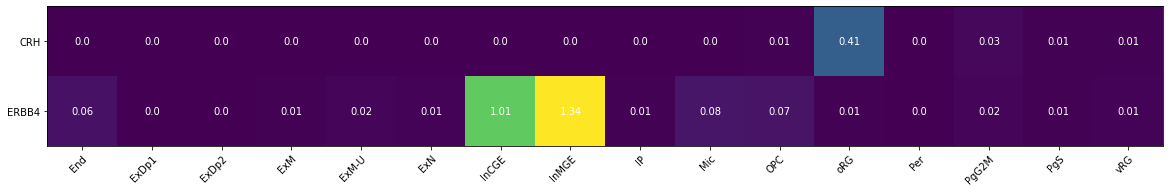

In [54]:
fig, ax = plt.subplots(figsize = (20,20))
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, np.round(harvest[i,j],2),
                       ha="center", va="center", color="w")

plt.savefig('/home/jovyan/KR_NAS/notebooks/HIPLEX_PANEL.pdf')
plt.show()



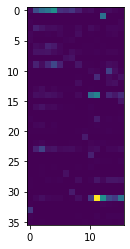

In [36]:
plt.imshow(harvest)